In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Dataset/coaster_db.csv')
df.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.580,-81.570,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


# Data Understanding

In [4]:
df.shape

(1087, 56)

In [5]:
df.Status.unique()

array(['Removed', 'Closed', 'Operating', nan, 'Not Currently Operating',
       'In Production', 'Discontinued',
       'closed for maintenance as of july 30 no reopening date known',
       'Closed in 2021', 'SBNO December 2019', 'Under construction',
       'Temporarily Closed', 'SBNO (Standing But Not Operating)',
       'Temporarily closed',
       'Chapter 7 bankruptcy; rides dismantled and sold; property sold',
       'Under Maintenance'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [7]:
# df.columns

In [8]:
for i in df.columns:
    print('**', i, end=' ')
    print(df[i].nunique())
    print()

** coaster_name 990

** Length 569

** Speed 243

** Location 280

** Status 15

** Opening date 656

** Type 98

** Manufacturer 102

** Height restriction 100

** Model 317

** Height 382

** Inversions 12

** Lift/launch system 116

** Cost 272

** Trains 221

** Park section 271

** Duration 208

** Capacity 160

** G-force 70

** Designer 153

** Max vertical angle 83

** Drop 235

** Soft opening date 84

** Fast Lane available 1

** Replaced 140

** Track layout 95

** Fastrack available 1

** Soft opening date.1 84

** Closing date 144

** Opened 16

** Replaced by 67

** Website 16

** Flash Pass Available 1

** Must transfer from wheelchair 1

** Theme 33

** Single rider line available 1

** Restraint Style 6

** Flash Pass available 1

** Acceleration 50

** Restraints 12

** Name 18

** year_introduced 101

** latitude 688

** longitude 691

** Type_Main 3

** opening_date_clean 602

** speed1 225

** speed2 229

** speed1_value 191

** speed1_unit 2

** speed_mph 176

** 

In [9]:
j = 1
for i in df.columns:
    print('[{no}]-->> '.format(no = j), i, "***\n")
    print(df[i].unique())
    print("\n")
    j+=1

[1]-->>  coaster_name ***

['Switchback Railway' 'Flip Flap Railway'
 'Switchback Railway (Euclid Beach Park)' 'Loop the Loop (Coney Island)'
 "Loop the Loop (Young's Pier)" 'Cannon Coaster' 'Leap-The-Dips'
 'Figure Eight (Euclid Beach Park)' 'Drop the Dip'
 'Scenic Railway (Euclid Beach Park)' 'Loop the Loop (Olentangy Park)'
 'Aero Dips' 'Backety-Back Scenic Railway' 'Racer (1910 roller coaster)'
 'Derby Racer' 'The Great Scenic Railway' 'Zippin Pippin' 'Racing Coaster'
 'Whirl Pool Dips' 'Green Dragon (Lake Compounce)'
 'The Wild One (roller coaster)' 'Jack Rabbit (Clementon Park)'
 'Jack Rabbit (Kennywood)' 'Jack Rabbit (Seabreeze)'
 'Scenic Railway (roller coaster)' 'Roller Coaster (Lagoon)'
 'Big Dipper (Blackpool Pleasure Beach)' 'Wild Cat (Hersheypark)'
 'The Bobs (roller coaster)' 'Giant Dipper' 'Pippin (roller coaster)'
 'The Thriller (roller coaster)' 'Thunderhawk (Dorney Park)'
 'Big Dipper (Geauga Lake)' 'Cyclone (Revere Beach)'
 'Giant Dipper (Belmont Park)' 'Jazz Railway

# Data Preparation

<li>Dropping irrelevant columns and rows</li>
 <li>Identifying duplicated columns<br></li>
 <li>Remaning columns<br></li>
 <li>Feature creation</li>

In [10]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [11]:
# df.columns

In [12]:


df1 = df[['coaster_name', 'Length',
    #'Speed', 
    'Location', 'Status',
    #'Opening date',
       #'Type',
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
     #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main','opening_date_clean', 
          #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
df1

,coaster_name,Length,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,770 ft (230 m),Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [13]:
# df[df.Manufacturer == 'Lina Beecher']

In [14]:
df1.shape

(1087, 14)

In [15]:
df1.dtypes

coaster_name           object
Length                 object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [16]:
df1['opening_date_clean'] = pd.to_datetime(df1['opening_date_clean'])

In [17]:
df1['year_introduced'] = pd.to_numeric(df1['year_introduced'])
# df1.year_introduced

In [18]:
df1.columns

Index(['coaster_name', 'Length', 'Location', 'Status', 'Manufacturer',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [19]:
df1 = df1.rename(columns={'coaster_name': 'Coaster_Name',
       'year_introduced': 'Year_Introduction', 'latitude': 'Latitude', 'longitude':'Longitude',
       'opening_date_clean':'Opening_Date_Clean', 'speed_mph':'Speed_mph','height_ft':'Height_ft', 'Inversions_clean':'Inversions',
       'Gforce_clean': 'Gforce'})
df1.head()

,Coaster_Name,Length,Location,Status,Manufacturer,Year_Introduction,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [20]:
df1.isnull().sum()

Coaster_Name            0
Length                134
Location                0
Status                213
Manufacturer           59
Year_Introduction       0
Latitude              275
Longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_mph             150
Height_ft             916
Inversions              0
Gforce                725
dtype: int64

In [21]:
# df duplicateing


In [22]:
df1.loc[df1.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Length,Location,Status,Manufacturer,Year_Introduction,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,"2,953 ft (900 m)",Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,NaN,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,NaN,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [23]:
# df1[df1.Coaster_Name == "Thunder Run (Canada's Wonderland)"]
# df1.query('Coaster_Name == "Big Thunder Mountain Railroad"')

In [24]:
df1.columns

Index(['Coaster_Name', 'Length', 'Location', 'Status', 'Manufacturer',
       'Year_Introduction', 'Latitude', 'Longitude', 'Type_Main',
       'Opening_Date_Clean', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [25]:
df1.loc[~df1.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date_Clean'])]

,Coaster_Name,Length,Location,Status,Manufacturer,Year_Introduction,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),"1,900 ft (580 m)",SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,770 ft (230 m),Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [26]:
# reset indices

df1 = df1.loc[~df1.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date_Clean'])] \
.reset_index(drop=True).copy()
df1

,Coaster_Name,Length,Location,Status,Manufacturer,Year_Introduction,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),"1,900 ft (580 m)",SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),"3,328 ft (1,014 m)",Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,770 ft (230 m),Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [27]:
# df1[df1.Coaster_Name == 'Big Thunder Mountain Railroad']

In [28]:
# df[df.coaster_name == 'Big Thunder Mountain Railroad']

# Feature Understanding

#### Univariate Analysis

##### <li>Plotting Feature  Distributiohn</li>
   <li>Histogram</li>
   <li>KDE</li>
   <li>Boxplot</li>

In [29]:
# year_counts = df1['Year_Introduction'].value_counts()


Text(0, 0.5, 'Counts')

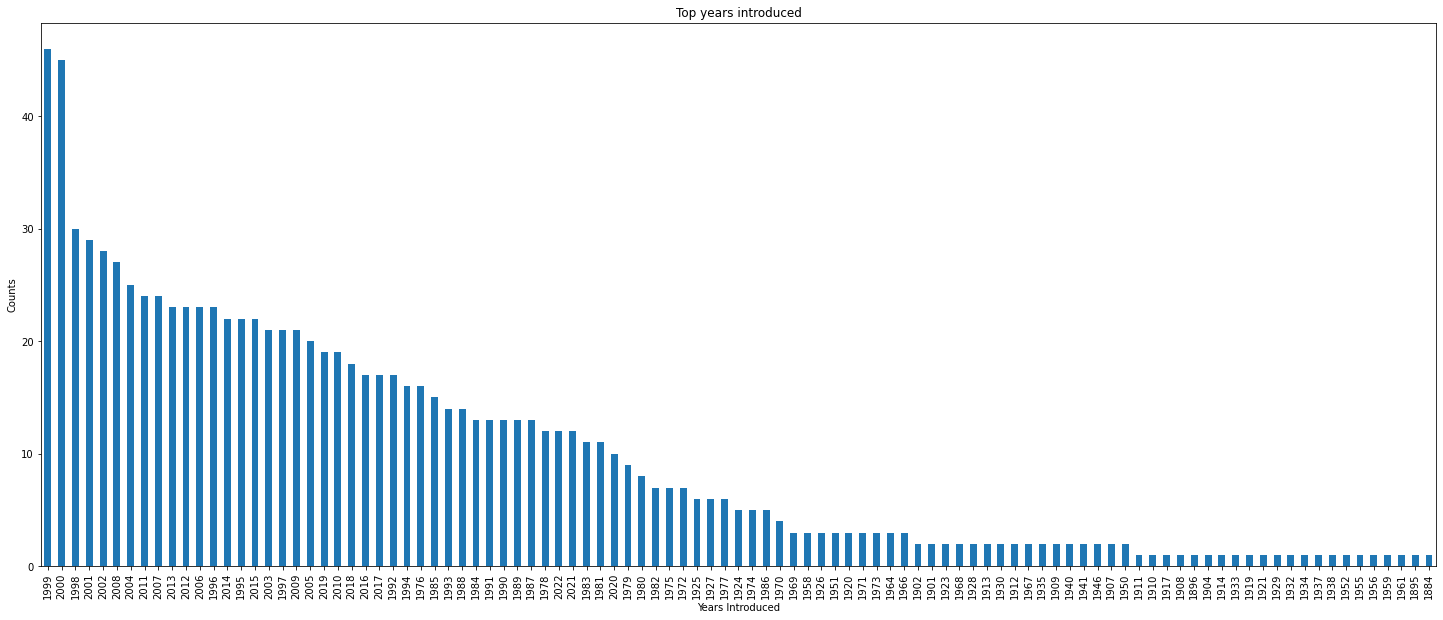

In [30]:
'''without sorting'''

plt.figure(figsize=(25, 10))

ax = df1["Year_Introduction"].value_counts() \
                        .plot(kind='bar', title='Top years introduced')
ax.set_xlabel('Years Introduced')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

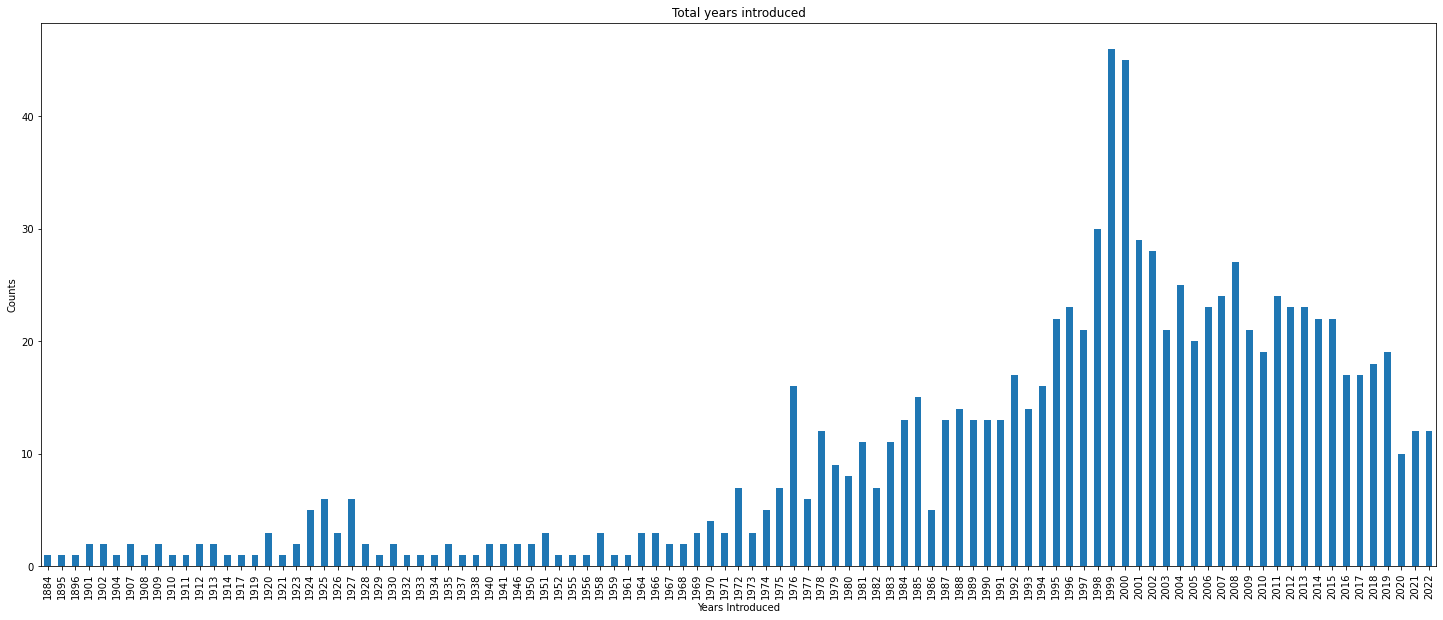

In [31]:
'''With sorting the indices'''

plt.figure(figsize=(25, 10))

ax = df1["Year_Introduction"].value_counts().sort_index() \
                        .plot(kind='bar', title='Total years introduced')
ax.set_xlabel('Years Introduced')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

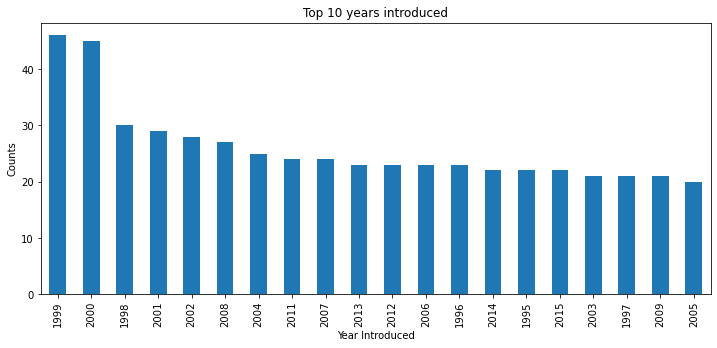

In [32]:
'''Top years Introduced'''

plt.figure(figsize=(12, 5))

ax = df1["Year_Introduction"].value_counts() \
                        .head(20) \
                        .plot(kind='bar', title='Top 10 years introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Counts')

In [33]:
df1.Speed_mph.value_counts()

50.0    54
55.0    38
40.0    36
45.0    31
49.7    28
        ..
16.2     1
57.8     1
53.4     1
17.0     1
49.0     1
Name: Speed_mph, Length: 176, dtype: int64

Text(0.5, 0, 'Speed (mph)')

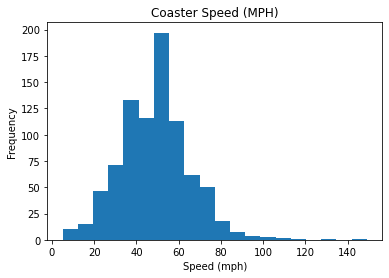

In [34]:
# df1.Speed_mph.max()

ax = df1.Speed_mph.plot(kind="hist", bins=20,  title="Coaster Speed (MPH)")
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

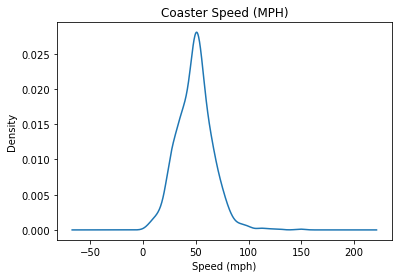

In [35]:
ax = df1.Speed_mph.plot(kind="kde",
                        title="Coaster Speed (MPH)")
ax.set_xlabel('Speed (mph)')

#  Feature Relationship

<li> Scatter Plot</li>
<li> Heatmap Correlation</li>
<li> PairPlot</li>
<li> Groupby</li>

In [44]:
df1


,Coaster_Name,Length,Location,Status,Manufacturer,Year_Introduction,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),"1,900 ft (580 m)",SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),"3,328 ft (1,014 m)",Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,770 ft (230 m),Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


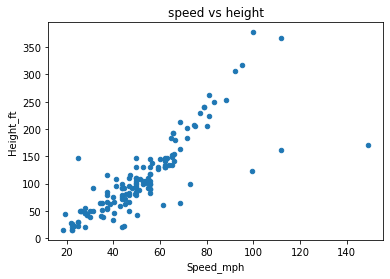

In [41]:
df1.plot(kind='scatter', 
        x='Speed_mph',
        y='Height_ft',
        title= 'speed vs height'
        )

plt.show()

<AxesSubplot:xlabel='Speed_mph', ylabel='Height_ft'>

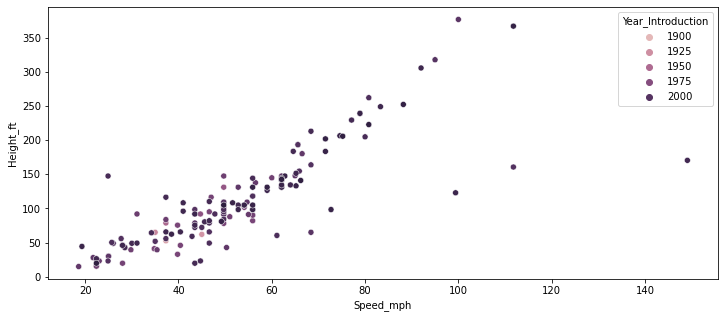

In [48]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Speed_mph', y='Height_ft', hue='Year_Introduction' ,data=df1)

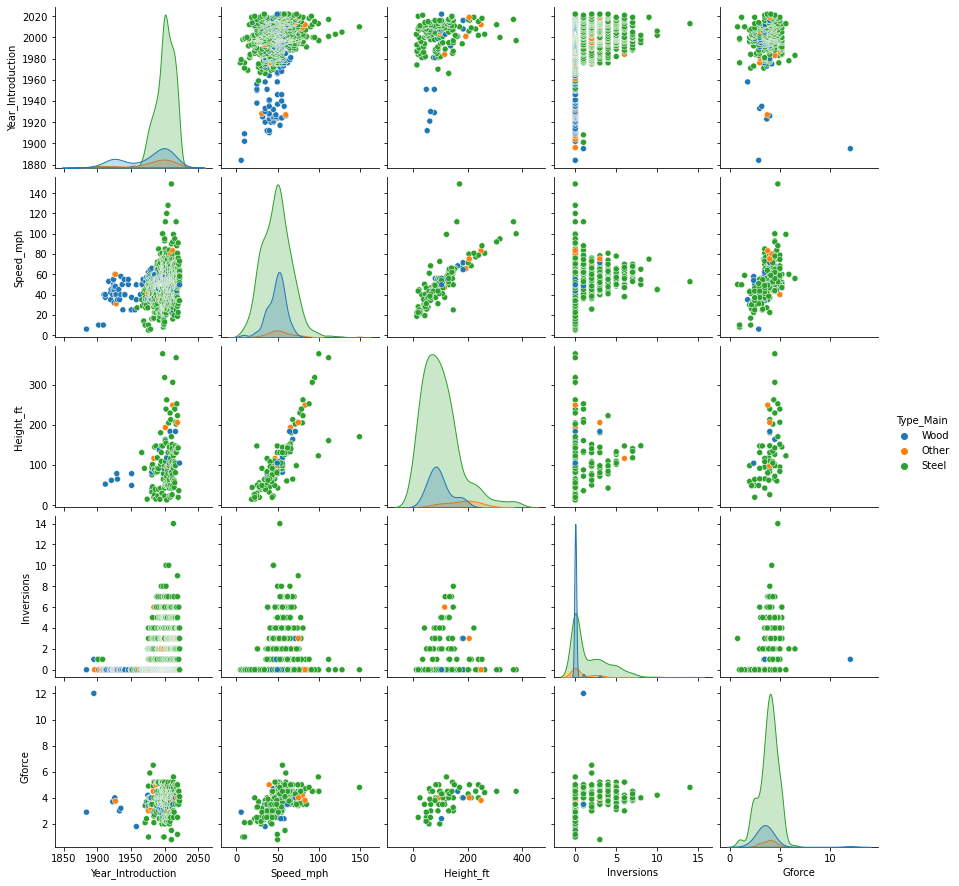

In [49]:
sns.pairplot(df1, vars=['Year_Introduction', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'],
            hue='Type_Main')

In [51]:
df_corr = df1[['Year_Introduction', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduction,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduction,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<AxesSubplot:>

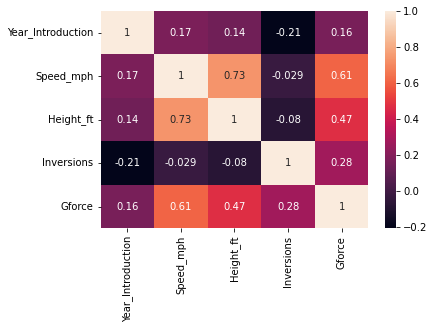

In [52]:
sns.heatmap(df_corr, annot=True)

In [53]:
df1.head()

,Coaster_Name,Length,Location,Status,Manufacturer,Year_Introduction,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,600 ft (180 m),Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,NaN,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [58]:
# what are the locations with the fastest roller coasters (min 10)

df1.query('Location != "Other"') \ 
        .groupby('Location')['Speed_mph'] \
        .agg(['mean', 'count']) \
        .query('count >= 10') \
        .sort_values('mean')

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_11012/219035623.py, line 3)

In [67]:
df1.loc[df1.Speed_mph.value_counts().head(10)]

,Coaster_Name,Length,Location,Status,Manufacturer,Year_Introduction,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_mph,Height_ft,Inversions,Gforce
54,Nickelodeon Streak,"2,293 ft (699 m)",Blackpool Pleasure Beach,Operating,NaN,1933,53.7908,-3.0544,Wood,1933-01-01,35.0,NaN,0,3.0
38,Thunderbolt (Savin Rock),"5,000 ft (1,500 m)",Savin Rock,Removed,Traver Engineering,1925,41.2570,-72.9500,Wood,1925-05-05,NaN,NaN,0,NaN
36,Jazz Railway,"1,200 ft (370 m)",Rocky Glen Park,Removed,Traver Engineering,1925,41.3533,-75.7059,Wood,1925-01-01,NaN,NaN,0,NaN
31,The Thriller (roller coaster),NaN,"Cleveland, Ohio, United States",Closed,NaN,1924,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
28,The Bobs (roller coaster),"3,235 ft (986 m)",Riverview Park,Removed,Prior and Church,1924,41.9407,-87.6924,Wood,1924-01-01,50.0,NaN,0,NaN
28,The Bobs (roller coaster),"3,235 ft (986 m)",Riverview Park,Removed,Prior and Church,1924,41.9407,-87.6924,Wood,1924-01-01,50.0,NaN,0,NaN
21,Jack Rabbit (Clementon Park),"1,380 ft (420 m)",Clementon Park,Removed,Philadelphia Toboggan Coasters,1919,39.8041,-74.9844,Wood,1919-01-01,NaN,NaN,0,NaN
20,The Wild One (roller coaster),"4,000 ft (1,200 m)",Six Flags America,NaN,Dinn Corporation,1917,38.9092,-76.7725,Wood,NaT,53.0,NaN,0,NaN
19,Green Dragon (Lake Compounce),NaN,Lake Compounce,Removed,NaN,1914,41.6420,-72.9230,Wood,1914-01-01,NaN,NaN,0,NaN
16,Zippin Pippin,"2,865 ft (873 m)",Other,NaN,The Gravity Group,1912,NaN,NaN,Wood,NaT,40.0,NaN,0,NaN
